In [1]:
from helper.synthesis import create_features_linspace
%load_ext autoreload
%autoreload 2

import os
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
os.getcwd()

'/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/FYP/FYP-Code'

In [2]:
from analysis.gridbased import model

In [3]:
models = model.init_model('dense')

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  240       
                                                                 
 dense_1 (Dense)             multiple                  930       
                                                                 
 dense_2 (Dense)             multiple                  930       
                                                                 
 dense_3 (Dense)             multiple                  1953      
                                                                 
 reshape (Reshape)           multiple                  0         
                                                                 
Total params: 4,053
Trainable params: 4,053
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


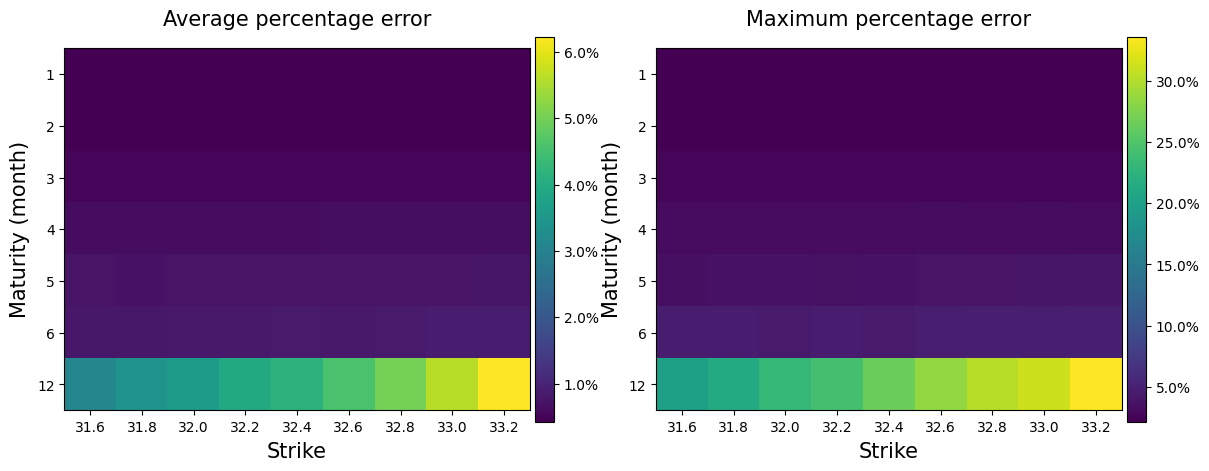

In [4]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

model.train_model(models, epochs = 100)

In [5]:
model.load_weights(models)

In [6]:
params_range_train, params_range_test, price_train, price_test = model.load_data()

In [9]:
model.calibrate(model = models, prices = price_test, parameters = params_range_test[0], epochs = 25)

100%|██████████| 25/25 [00:24<00:00,  1.02it/s]


4000